# A brief description

In this Jupyter notebook, first, the different airlines about which comments have been tweeted are going to be compared. For this purpose, unique names of people and unique airline names have been extracted. Also, for comparison, sentiments have been converted to numercial values, and the average of them have been calculated for comparison between airlines as well.

In the second part of the code, all the tweets have been considered. Also, since some comments include reference to other comments, they have been joined. To estimate the sentiment from the text, two approaches have been made:

1) First, count of words have been calculated after processing the sentences in the texts.
2) In the second approach, tf-idf has been calculated as features of the classifier used.

In addition to the two approaches, two comparisons have been made:

1) Models with more features than text have been compared to models with text only.
2) Imbalance in data have been removed to prevent the model from being biased towards one label. The resultant two models have been compared.


# Comparison between airlines:

### Reading the data and preprocessing:

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("C:\\Users\\MICROTECH\\Downloads\\Tweets.csv")


#Extracting unique names of people (to eliminate multiple comments by the same people)
name=[]
index=[]
for i in range(len(df)):
    if df['name'][i] not in name:
        name.append(df['name'][i]) 
        index.append(i)

df=df.iloc[index]
df=df.reset_index()


#get unique names for the airlines:
airline=list()
for i in range(len(df)):
    if df['airline'][i] not in airline:
        airline.append(df['airline'][i])


#In order to get an anerage score and work with sentiments as labels, we should change them into numerical values:
df['airline_sentiment']=df['airline_sentiment'].astype('category').cat.codes
df.info

<bound method DataFrame.info of       index            tweet_id  airline_sentiment  \
0         0  570306133677760513                  1   
1         1  570301130888122368                  2   
2         2  570301083672813571                  1   
3         6  570300616901320704                  2   
4         7  570300248553349120                  1   
...     ...                 ...                ...   
7696  14632  569587813856841728                  1   
7697  14634  569587691626622976                  0   
7698  14635  569587686496825344                  2   
7699  14636  569587371693355008                  0   
7700  14637  569587242672398336                  1   

      airline_sentiment_confidence          negativereason  \
0                           1.0000                     NaN   
1                           0.3486                     NaN   
2                           0.6837                     NaN   
3                           0.6745                     NaN   
4        

In [2]:
#separate different sentiments
negative= df[df['airline_sentiment']==0]
neutral=df[df['airline_sentiment']==1]
positive= df[df['airline_sentiment']==2]

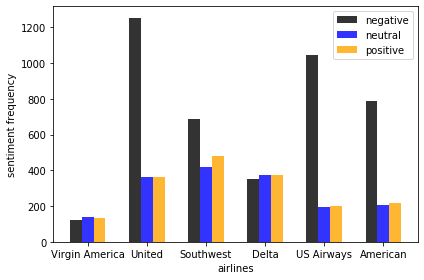

In [4]:
import matplotlib.pyplot as plt

# Bar plots for comparison between different airlines:
n_groups = len(airline)

neg =(len(negative[negative['airline']==airline[0]]) ,len(negative[negative['airline']==airline[1]]),
len(negative[negative['airline']==airline[2]]),len(negative[negative['airline']==airline[3]]),
len(negative[negative['airline']==airline[4]]),len(negative[negative['airline']==airline[5]]))

neu= ( len(neutral[neutral['airline']==airline[0]]) ,len(neutral[neutral['airline']==airline[1]]),
len(neutral[neutral['airline']==airline[2]]),len(neutral[neutral['airline']==airline[3]]),
len(neutral[neutral['airline']==airline[4]]),len(neutral[neutral['airline']==airline[5]]))

pos= ( len(positive[positive['airline']==airline[0]]) ,len(positive[positive['airline']==airline[1]]),
len(positive[positive['airline']==airline[2]]),len(positive[positive['airline']==airline[3]]),
len(positive[positive['airline']==airline[4]]),len(positive[positive['airline']==airline[5]]))


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, neg, bar_width,
alpha=opacity,
color='k',
label='negative')

rects2 = plt.bar(index + bar_width, neu, bar_width,
alpha=opacity,
color='b',
label='neutral')
rects3 = plt.bar(index + 2*bar_width, pos, bar_width,alpha=opacity,color='orange',label='positive')

plt.xlabel('airlines')
plt.ylabel('sentiment frequency')
plt.title('')
plt.xticks(index + bar_width, (airline[0], airline[1], airline[2], airline[3], airline[4], airline[5]))
plt.legend()

plt.tight_layout()
plt.show()



In [5]:
#calculating scores for each airline based on average of scores:

score1= (sum(neutral[neutral['airline']==airline[0]]['airline_sentiment'])+sum(positive[positive['airline']==airline[0]]['airline_sentiment']))/len(df[df['airline']==airline[0]])
score2= (sum(neutral[neutral['airline']==airline[1]]['airline_sentiment'])+sum(positive[positive['airline']==airline[1]]['airline_sentiment']))/len(df[df['airline']==airline[1]])
score3= (sum(neutral[neutral['airline']==airline[2]]['airline_sentiment'])+sum(positive[positive['airline']==airline[2]]['airline_sentiment']))/len(df[df['airline']==airline[2]])
score4= (sum(neutral[neutral['airline']==airline[3]]['airline_sentiment'])+sum(positive[positive['airline']==airline[3]]['airline_sentiment']))/len(df[df['airline']==airline[3]])
score5= (sum(neutral[neutral['airline']==airline[4]]['airline_sentiment'])+sum(positive[positive['airline']==airline[4]]['airline_sentiment']))/len(df[df['airline']==airline[4]])
score6= (sum(neutral[neutral['airline']==airline[5]]['airline_sentiment'])+sum(positive[positive['airline']==airline[5]]['airline_sentiment']))/len(df[df['airline']==airline[5]])




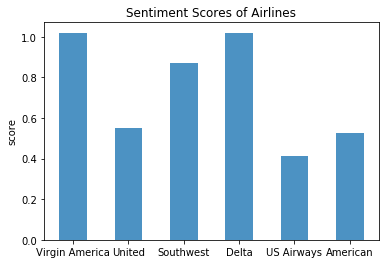

In [6]:
airlines= (airline[0], airline[1], airline[2], airline[3], airline[4], airline[5])
y_pos = np.arange(len(airlines))
performance = [score1,score2,score3,score4,score5,score6]

plt.bar(y_pos, performance, align='center', alpha=0.8, width =0.5)
plt.xticks(y_pos, airlines)
plt.ylabel('score')
plt.title('Sentiment Scores of Airlines')

plt.show()

# Sentiment estimation

### Reading the data and preprocessing:

In [7]:
#We consider all of the comments (even multiple ones from one person) to estimate the sentiment:

df = pd.read_csv("C:\\Users\\MICROTECH\\Downloads\\Tweets.csv")

df['negativereason'] =df['negativereason'].replace(np.nan, 'No comments' )
categorical_var=['airline_sentiment','negativereason']

for i in range(2):
    df[categorical_var[i]]=df[categorical_var[i]].astype('category').cat.codes




In [ ]:
# considering people's reference to other comments:

for i in range(len(df)):
    for j in range(len(name)):
        if name[j] in df['text'][i]:
            ind= name.index(name[j])
            df['text'][i]=df['text'][i] + df['text'][index[ind]]
    

In [20]:
len(df)

14640

### Approach 1 : tf-idf

#### Data conversion:

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
Xtr, Xte, ytr, yte = train_test_split(df['text'], df['airline_sentiment'], test_size=0.3, random_state=1)
#train_data , test_data, train_lbl, test_lbl = train_test_split(df[additional_features], df['airline_sentiment'], test_size=0.3, random_state=1)
tf=TfidfVectorizer()
tf.fit(Xtr)
Xtr= tf.transform(Xtr)
Xte=tf.transform(Xte)


#### Classification:


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
rf=RandomForestClassifier()
rf.fit(Xtr, ytr)                       
predicted= rf.predict(Xte)
print("Random Forest Accuracy:",metrics.accuracy_score(yte, predicted))
f1_score(y_test, predicted, average=None)

C:\Users\MICROTECH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Accuracy: 0.7281420765027322


array([0.83303873, 0.44444444, 0.51301115])

#### َAdding additional features to text features:

In [29]:
additional_features=['airline_sentiment_confidence','negativereason']
train_data , test_data, train_lbl, test_lbl = train_test_split(df[additional_features], df['airline_sentiment'], test_size=0.3, random_state=1)
Xtr = hstack((Xtr,np.array(train_data)))
Xte=hstack((Xte,np.array(test_data)))

array([0.83303873, 0.44444444, 0.51301115])

#### Classification with additional features:

In [30]:
rf=RandomForestClassifier()
rf.fit(Xtr, ytr)                       
predicted= rf.predict(Xte)
print("Random Forest Accuracy:",metrics.accuracy_score(yte, predicted))
f1_score(y_test, predicted, average=None)

C:\Users\MICROTECH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Accuracy: 0.8604280510018215


array([0.94758837, 0.73165506, 0.63884157])

### Approach 2: word counts

In [31]:
# Before processing the text, we need to split the data including both dependent (sentiment)
#and independent variable (text)
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['airline_sentiment'], test_size=0.3, random_state=1)
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
cv.fit(df['text'])
X_train= cv.transform(X_train)
X_test=cv.transform(X_test)



In [32]:
# classification with random forest:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
predicted= rf.predict(X_test)
print("RandomForest Accuracy:",metrics.accuracy_score(y_test, predicted))
f1_score(y_test, predicted, average=None)

C:\Users\MICROTECH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest Accuracy: 0.7233606557377049


array([0.82644915, 0.48785997, 0.58193445])

Brief conclusion:
We are able to estimate the sentiments based on text only by an accuracy of approximately 0.723, but since data is imbalanced, we need to have f1_score to evaluate the model. As can be seen, negative labels are more probable to be estimated than neutral and positive sentiments. 

We add other features such as "sentiment confidence" and "negative reason" to see if we can enhance the model performance. 

#### Adding more features

In [33]:
# Adding more features and stacking all together:
X_train = hstack((X_train,np.array(train_data)))
X_test=hstack((X_test,np.array(test_data)))

#### Classification with more features:

In [34]:

rf=RandomForestClassifier()
rf.fit(X_train, y_train)
predicted= rf.predict(X_test)
print("RandomForest Accuracy:",metrics.accuracy_score(y_test, predicted))
f1_score(y_test, predicted, average=None)

C:\Users\MICROTECH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest Accuracy: 0.9107468123861566


array([0.99094531, 0.81616162, 0.71138846])

Brief conclusion: As can be seen the accuracy of the model was enhanced significantly. But still, the model works better at the estimation of negative comments.

### Addressing imbalance in data labels:

####  balancing the labels:

In [37]:
#solution to imbalance: 
negative= df[df['airline_sentiment']==0]
neutral=df[df['airline_sentiment']==1]
positive= df[df['airline_sentiment']==2]
minimum= min(len(negative), len(neutral), len(positive))
(len(negative), len(neutral), len(positive))
negative=negative.sample(minimum)
neutral=neutral.sample(minimum)
df= pd.concat([negative,neutral,positive])

#### processing and classification:

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['airline_sentiment'], test_size=0.3, random_state=1)
train_data , test_data, train_lbl, test_lbl = train_test_split(df[additional_features], df['airline_sentiment'], test_size=0.3, random_state=1)
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
cv.fit(df['text'])
X_train= cv.transform(X_train)
X_test=cv.transform(X_test)

X_train = hstack((X_train,np.array(train_data)))
X_test=hstack((X_test,np.array(test_data)))
rf=RandomForestClassifier()
rf.fit(X_train, y_train)                       

predicted= rf.predict(X_test)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, predicted))
f1_score(y_test, predicted, average=None)


C:\Users\MICROTECH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Accuracy: 0.8321579689703809


array([0.96423462, 0.78917558, 0.74033149])

#### Conclusion:

In the last model, although the labels have been balanced, but the f score for each label has not changed considerably in comparison to the imbalanced model. So, the model with extra features including negative reason and sentiment confidence with text features and original imbalanced labels is the best model. This random forest classifier can predict the sentiments with an overal accuracy of 0.911 and fscore of 0.991, 0.816 , 0.711 for negative, neutral and positive classe, respectively.